# Download the Data

In [1]:
#!curl -L "https://universe.roboflow.com/ds/9tzVSjCYpr?key=xTwTsZl2QP" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# Visulize the Data

In [2]:
import matplotlib.pyplot as plt
import os
import torch

In [3]:
import yaml
with open('data.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)
yaml_data

{'train': 'train/images',
 'val': 'valid/images',
 'test': 'test/images',
 'nc': 1,
 'names': ['face'],
 'roboflow': {'workspace': 'face-detection-and-recognition-dataset',
  'project': 'droneface',
  'version': 8,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/face-detection-and-recognition-dataset/droneface/dataset/8'}}

In [4]:
train_image_path=yaml_data['train']
train_image_path

'train/images'

In [5]:
import random

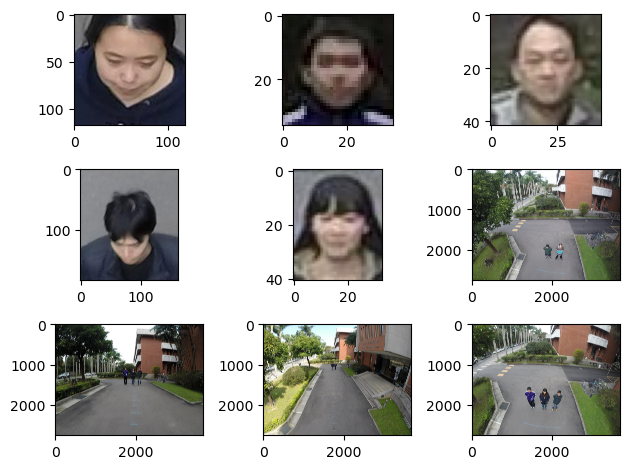

In [6]:
show_number=3
fig,ax=plt.subplots(show_number,show_number)
for i in range(show_number):
    for j in range(show_number):
        image_path = os.path.join(train_image_path,random.choice(os.listdir(train_image_path)))
        ax[i,j].imshow(plt.imread(image_path))
plt.tight_layout()
plt.show()

# Training Loop and Experiment tracking

In [7]:
os.getcwd()

'/home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_Custom_Yolo_Training'

In [8]:
MODEL_PATH=os.path.join(os.getcwd(),'models//yolo11m.pt')
if os.path.exists(MODEL_PATH):
    print(MODEL_PATH)

/home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_Custom_Yolo_Training/models//yolo11m.pt


In [9]:
from ultralytics import YOLO
model=YOLO(MODEL_PATH)

In [ ]:
# from ultralytics import YOLO, settings
# import mlflow

# # Update a setting
# from ultralytics import settings
# # settings.update({'mlflow': False})
# # mlflow.end_run()

# # Make sure MLflow is enabled in settings
# settings.update({'mlflow': True})
# mlflow.set_tracking_uri("http://127.0.0.1:5000")
# # mlflow.end_run()
# mlflow.set_experiment("mlflow_simple_new")
# mlflow.set_tag('mlflow.runName', 'yolo11n')

# # Start an MLflow run
# with mlflow.start_run():
#     # Your training code here
#     model = YOLO('yolo11n.pt')
#     results = model.train(data=yaml_data, epochs=1, imgsz=640)

#     # Log metrics, parameters, or artifacts as needed
#     mlflow.log_param("epochs", 1)
#     mlflow.log_metrics({"mAP": results.metrics.map})  # Example metric

#     # Don't forget to log your model at the end of training
#     mlflow.pytorch.log_model(model, "model")
#       # End the MLflow run
#     mlflow.end_run()

In [1]:
from datetime import datetime
experiment_name='Drone_Face_Yolo'
!export MLFLOW_EXPERIMENT_NAME={experiment_name}
!export MLFLOW_RUN=base_{datetime.now().strftime('%Y%m%d%H%M%S')}

In [2]:
from ultralytics import settings,YOLO
import os

settings.update({'mlflow': True})
settings.reset()

# Ensure the 'runs/mlflow' directory exists
# mlflow_dir = os.path.join('runs', 'mlflow')
# os.makedirs(mlflow_dir, exist_ok=True)

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolo11n.pt')

data_yaml = os.path.join(os.getcwd(), 'data.yaml')

results = model.train(data=data_yaml, epochs=50)

Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<00:00, 5198.84it/s]

train: New cache created: /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache



val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 1892.33it/s]

val: New cache created: /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2024/12/25 19:09:21 INFO mlflow.tracking.fluent: Experiment with name '/Shared/Ultralytics' does not exist. Creating a new experiment.


MLflow: logging run_id(46e17491d58547b5aedf0385d1dbe0d8) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.35G      1.095      1.781      1.458         32        640: 100%|██████████| 103/103 [00:13<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.67it/s]


                   all        206        428      0.924     0.0569      0.155     0.0498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.37G      1.118      1.072       1.43         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.90it/s]

                   all        206        428      0.436      0.327      0.318      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.37G      1.116      0.883      1.414         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.83it/s]

                   all        206        428      0.399      0.416      0.248     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.37G      1.057     0.7337       1.37         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]

                   all        206        428      0.663      0.418      0.434      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.36G      1.056     0.6739       1.37         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]

                   all        206        428      0.578      0.456       0.41      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.38G      1.012     0.6232      1.342         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]

                   all        206        428       0.81      0.458      0.519      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.36G     0.9802     0.5688      1.321         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]

                   all        206        428        0.7      0.555      0.567      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.37G     0.9826     0.5448      1.313         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]

                   all        206        428      0.763      0.611      0.654      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.38G     0.9573     0.5494      1.296         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        206        428      0.662      0.507      0.548      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.36G     0.9201     0.5282      1.267         49        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]

                   all        206        428      0.856      0.584      0.679      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.36G     0.9014     0.5022       1.26         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]

                   all        206        428      0.724      0.649      0.664      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.36G     0.8995     0.4849      1.263         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.74it/s]

                   all        206        428      0.801      0.546      0.604      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.36G     0.8765     0.4759      1.245         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]

                   all        206        428      0.771      0.619      0.658      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.36G     0.8873     0.4778      1.255         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]

                   all        206        428      0.784      0.614      0.677      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.36G     0.8374     0.4484      1.214         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        206        428      0.778      0.614      0.668      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.36G      0.845     0.4611      1.219         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]

                   all        206        428      0.775      0.561      0.646      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.36G     0.8563     0.4599      1.225         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]

                   all        206        428      0.825      0.617      0.689      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.36G     0.8282     0.4402       1.22         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.36it/s]

                   all        206        428      0.774      0.584      0.665      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.8174     0.4315      1.205         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]

                   all        206        428      0.897      0.612      0.721      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.36G     0.8162     0.4261      1.212         26        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]

                   all        206        428      0.779       0.64      0.688      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.36G     0.8155     0.4183      1.203         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]

                   all        206        428      0.821       0.57      0.641      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.36G     0.7956     0.4134        1.2         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]

                   all        206        428       0.86      0.607       0.71      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.36G     0.7774     0.4005      1.179         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        206        428      0.887      0.607      0.739      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.7818     0.4024      1.186         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]

                   all        206        428      0.878      0.636      0.726      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.36G     0.7653     0.3852      1.175         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]

                   all        206        428      0.834      0.621      0.709      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.36G     0.7895     0.3964      1.178         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        206        428      0.827      0.639      0.743      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.38G     0.7734     0.3925      1.174         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.45it/s]

                   all        206        428      0.876      0.626       0.72      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.37G      0.758     0.3924      1.167         24        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]

                   all        206        428       0.91      0.666      0.769      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.36G     0.7618     0.3853      1.168         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]

                   all        206        428      0.917      0.661      0.759      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.36G     0.7377     0.3732      1.155         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]

                   all        206        428       0.93      0.614      0.747       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.36G      0.726      0.368      1.148         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]

                   all        206        428        0.9      0.626      0.756      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.38G     0.7161     0.3676      1.138         26        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]

                   all        206        428      0.868      0.616      0.725      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.36G     0.7164     0.3605      1.138         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]

                   all        206        428      0.918      0.661      0.792      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.36G     0.7139     0.3586      1.141         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]

                   all        206        428      0.911      0.643       0.78       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G     0.7055     0.3552      1.138         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]

                   all        206        428      0.831      0.655      0.771      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.37G     0.7104     0.3581      1.129         43        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]

                   all        206        428      0.912      0.664      0.779      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.7077      0.351      1.144         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]

                   all        206        428      0.858      0.654      0.781      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.36G     0.6981     0.3452       1.13         46        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]

                   all        206        428      0.882      0.714      0.811      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.38G     0.6735     0.3314      1.109         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.71it/s]

                   all        206        428      0.841      0.707      0.792      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.39G     0.6819     0.3331       1.12         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]

                   all        206        428      0.852      0.694      0.798      0.459


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.47G     0.6086     0.2929      1.123         17        640: 100%|██████████| 103/103 [00:12<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.68it/s]

                   all        206        428      0.911      0.626      0.756      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.36G     0.6003      0.285      1.104         16        640: 100%|██████████| 103/103 [00:11<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.23it/s]

                   all        206        428      0.877      0.682      0.806      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.36G     0.5934      0.276      1.108         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.49it/s]

                   all        206        428      0.869      0.694      0.813      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.36G     0.5771     0.2649      1.091         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]

                   all        206        428       0.91      0.654        0.8      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.36G     0.5688     0.2614      1.078         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.75it/s]

                   all        206        428       0.82      0.675      0.774      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.36G     0.5603     0.2597      1.081         18        640: 100%|██████████| 103/103 [00:11<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]

                   all        206        428      0.917      0.633      0.797      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.36G     0.5593     0.2557      1.073         18        640: 100%|██████████| 103/103 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]

                   all        206        428      0.887      0.658      0.792      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.36G     0.5424     0.2479      1.068         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]

                   all        206        428      0.837      0.696        0.8       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.36G     0.5325     0.2435      1.057         20        640: 100%|██████████| 103/103 [00:11<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.25it/s]

                   all        206        428       0.84      0.684      0.805      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.36G     0.5331     0.2409      1.051         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]

                   all        206        428      0.852      0.696      0.807      0.457



50 epochs completed in 0.184 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]


                   all        206        428      0.839      0.684      0.805      0.464
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


# Metrics Inference

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px

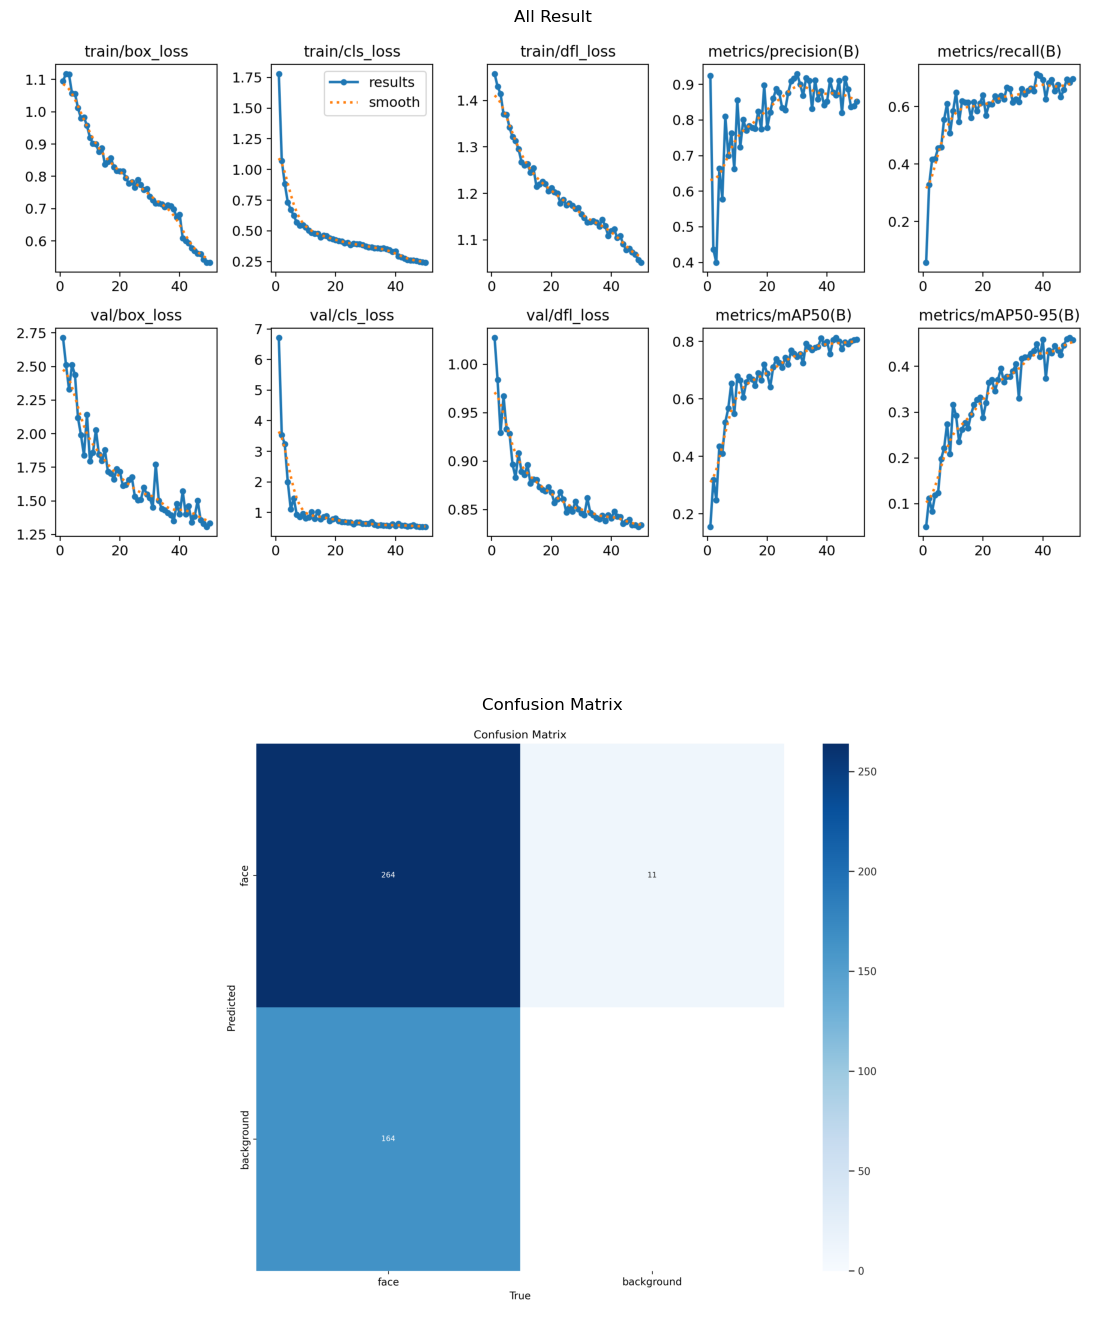

In [21]:
fig,ax=plt.subplots(2,1,figsize=(14,17))
ax[0].imshow(plt.imread("runs/mlflow/815816533873947567/46e17491d58547b5aedf0385d1dbe0d8/artifacts/results.png"))
ax[1].imshow(plt.imread("runs/mlflow/815816533873947567/46e17491d58547b5aedf0385d1dbe0d8/artifacts/confusion_matrix.png"))
ax[0].set_title("All Result")
ax[1].set_title("Confusion Matrix")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

`Note 1`
1. Drone as Weapon/servillaince: If this model is developing for drone which is use as weapon, the recall take precidence over precision
It low value of recall means high false negative(1,0 case), The detected object was actually enemy and it predicted it as not enemy
Other example could be cancer detection models

2. Drone for civilian purpose: It the drone usage in civilian area, if the prediction is false, it may not lead to human life

`Note 2`

1. As the metrics(recall) still increasing and loss still decrease, more number of epochs can be explored based on computer resources available.
2. Recall can be hypertuning metric

# Hyperparameter tuning

In [1]:
from ultralytics import settings,YOLO
import os

settings.update({'mlflow': True})
settings.reset()


# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolo11n.pt')

data_yaml = os.path.join(os.getcwd(), 'data.yaml')

search_space={
    'lr0': [0.001, 0.01]
}
model.tune(data=data_yaml,
           epochs=100,
           iterations=5,
           batch=16,
           translate=0.2,
           warmup_epochs=3,
           space=search_space,
           plots=True,
           val=True,
           save=True)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune7'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01}
New https://pypi.org/project/ultralytics/8.3.55 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dr

train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(06224ff240ed427a88bf39e6ef98487c) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train15
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.35G      1.117      1.802      1.476         31        640: 100%|██████████| 103/103 [00:12<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]


                   all        206        428      0.748     0.0969      0.198     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.116      1.106      1.441         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.50it/s]


                   all        206        428      0.588      0.346      0.358      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.135     0.8923      1.434         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


                   all        206        428       0.57      0.387      0.382      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.116     0.7876      1.426         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]


                   all        206        428      0.486      0.318       0.32      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.048     0.6787      1.367         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


                   all        206        428      0.576      0.453      0.448      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.064     0.6566      1.387         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


                   all        206        428      0.698      0.501      0.557      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.026     0.6068      1.351         42        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]


                   all        206        428      0.695      0.526      0.557      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G     0.9959     0.5833      1.328         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


                   all        206        428      0.569      0.509      0.486      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G     0.9811     0.5581      1.325         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]


                   all        206        428      0.766      0.582      0.632      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G     0.9429      0.538      1.284         47        640: 100%|██████████| 103/103 [00:11<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.779      0.614      0.651      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G     0.9241     0.5223       1.28         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.57it/s]


                   all        206        428      0.798      0.589      0.659      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G     0.9273      0.517      1.301         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]


                   all        206        428        0.8      0.556      0.616      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G     0.9264     0.5066      1.276         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]


                   all        206        428      0.786      0.599      0.662       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G     0.9066     0.4941      1.272         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428      0.745      0.614      0.661      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G     0.8827     0.4813      1.261         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]


                   all        206        428       0.79      0.603      0.668      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G     0.9061     0.4967      1.254         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]


                   all        206        428       0.78      0.631      0.673      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G     0.8715     0.4705       1.24         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.61it/s]


                   all        206        428      0.797      0.629      0.691      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G     0.8635     0.4687      1.248         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.09it/s]


                   all        206        428      0.795      0.588      0.658      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G     0.8701      0.475      1.242         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]


                   all        206        428      0.833      0.558      0.617      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G     0.8535      0.454      1.236         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


                   all        206        428      0.759      0.669      0.696      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G     0.8389     0.4449       1.23         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]


                   all        206        428      0.846      0.607       0.69      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.8292     0.4372      1.221         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.837      0.562      0.656      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G     0.8298     0.4292      1.215         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]


                   all        206        428      0.863      0.647      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G       0.82     0.4313      1.209         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.842      0.633      0.731      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G     0.8124     0.4184       1.21         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.821      0.675      0.754      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      0.848     0.4366      1.224         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.855      0.598       0.69      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.8129     0.4246      1.202         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.88it/s]


                   all        206        428      0.808      0.631      0.694      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.7999     0.4187      1.192         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.71it/s]


                   all        206        428      0.815      0.673      0.736      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8238     0.4232      1.211         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.873      0.694       0.78       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.7855     0.4109      1.182         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.844      0.681      0.745      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G     0.8086     0.4165      1.196         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.54it/s]


                   all        206        428      0.904      0.705      0.808      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G     0.7819     0.4024      1.179         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428      0.891       0.64      0.731      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G     0.7808     0.3989       1.18         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.84it/s]


                   all        206        428      0.849      0.642      0.731      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.7884        0.4      1.187         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.27it/s]


                   all        206        428      0.921      0.671      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.7842     0.4049      1.188         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.891      0.696      0.777      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.38G     0.7671     0.3885      1.177         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428      0.859      0.689       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7739     0.4057       1.19         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.881      0.642      0.734      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.7858     0.4079      1.186         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.848      0.657      0.734       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.7453     0.3918      1.154         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.75it/s]


                   all        206        428      0.853      0.619      0.705      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.39G     0.7543     0.3859      1.166         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]


                   all        206        428       0.91      0.664      0.781      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.7711     0.3943      1.173         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.866      0.667      0.766      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7463     0.3746       1.16         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428       0.86      0.674      0.771      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.7382       0.38      1.151         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.60it/s]


                   all        206        428      0.897      0.674      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G     0.7282     0.3731       1.15         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]


                   all        206        428      0.893      0.663      0.787      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.7254     0.3661      1.138         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


                   all        206        428      0.877      0.683      0.771      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.7315     0.3687      1.152         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.876      0.658      0.756      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7353     0.3702      1.146         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.916      0.703      0.819      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7295      0.369      1.144         27        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


                   all        206        428       0.86      0.703      0.781      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      0.728     0.3686      1.154         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.904      0.704      0.807      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.7106     0.3638      1.135         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.03it/s]


                   all        206        428      0.861      0.692      0.796      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7133     0.3601      1.143         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.928       0.66      0.812      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.7267     0.3689      1.151         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428        0.9      0.675      0.805      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7003     0.3567      1.132         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


                   all        206        428      0.865      0.673      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.7043     0.3438      1.131         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


                   all        206        428      0.861      0.703      0.785       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7051     0.3486      1.134         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.32it/s]


                   all        206        428      0.913      0.666      0.787      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.7155     0.3617      1.141         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.75it/s]


                   all        206        428      0.926      0.685      0.795      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.7109     0.3542      1.145         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


                   all        206        428      0.882      0.678       0.79      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.7144     0.3523      1.142         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.924      0.687        0.8       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.6989     0.3498      1.127         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


                   all        206        428      0.915      0.694      0.804       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6909     0.3456      1.122         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.40it/s]


                   all        206        428      0.907      0.705      0.814      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.707     0.3441      1.136         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.51it/s]


                   all        206        428      0.921      0.679      0.804      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.6804     0.3363      1.119         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.09it/s]


                   all        206        428        0.9       0.68      0.787      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.6817     0.3384      1.124         24        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.57it/s]


                   all        206        428      0.921      0.696      0.797       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.6597     0.3292      1.108         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]


                   all        206        428      0.934      0.696      0.834      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.6651     0.3349       1.11         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.908      0.668      0.786      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6748     0.3452      1.112         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.60it/s]


                   all        206        428      0.923      0.705      0.817      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.6679     0.3349      1.107         45        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]


                   all        206        428      0.915      0.694      0.815       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.6688     0.3321      1.114         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.83it/s]


                   all        206        428      0.884      0.675      0.779      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.6652     0.3331      1.103         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.882      0.664      0.777      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6586     0.3247        1.1         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.897      0.703      0.801      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.6419     0.3228      1.099         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.903      0.672      0.784      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.6468     0.3086      1.102         20        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.906      0.674      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6674     0.3223      1.113         34        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428      0.908      0.667      0.798      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6538     0.3243      1.105         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.00it/s]


                   all        206        428      0.926      0.666      0.803      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G     0.6284     0.3037      1.085         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.84it/s]


                   all        206        428      0.935      0.689      0.825      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.36G     0.6514      0.322      1.104         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.03it/s]


                   all        206        428      0.923      0.694      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.6289     0.3073      1.094         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


                   all        206        428      0.915       0.68      0.808      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G     0.6416     0.3083      1.095         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


                   all        206        428       0.93      0.706      0.825      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.6286     0.3063      1.092         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]


                   all        206        428      0.938      0.671      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G     0.6335     0.3059      1.088         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.911      0.672      0.813      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.6201     0.3018      1.081         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.927      0.668      0.828      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.6177     0.3096      1.085         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


                   all        206        428      0.901      0.678      0.784      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G     0.6258     0.3078      1.091         23        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


                   all        206        428      0.931      0.694      0.834      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G     0.6232     0.2998      1.087         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.40it/s]


                   all        206        428      0.895      0.699      0.815      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.6091      0.299      1.081         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.911      0.694      0.821      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.6234     0.2999      1.091         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.902      0.689      0.815      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      0.601     0.2923       1.08         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


                   all        206        428      0.927      0.682      0.827      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.6081     0.2978      1.083         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]


                   all        206        428      0.922       0.69       0.82      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.6054     0.2933      1.072         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


                   all        206        428      0.933      0.692      0.817      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.6047     0.2878      1.076         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.00it/s]


                   all        206        428       0.92      0.682       0.82      0.505
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.47G     0.5106     0.2343      1.057         15        640: 100%|██████████| 103/103 [00:12<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.926      0.682      0.801      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.5022     0.2317      1.051         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.899      0.689        0.8      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.4951     0.2214      1.031         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]


                   all        206        428      0.912      0.673      0.802       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G      0.491     0.2246      1.042         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.79it/s]


                   all        206        428      0.939      0.682      0.817      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G      0.486     0.2203       1.03         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.916      0.708      0.827      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.4871     0.2198      1.029         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]


                   all        206        428      0.923      0.689      0.814      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.4793     0.2152      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.938      0.687      0.831      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G     0.4754      0.213      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]


                   all        206        428      0.927      0.692      0.827      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      0.478     0.2138      1.032         14        640: 100%|██████████| 103/103 [00:11<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.60it/s]


                   all        206        428      0.923        0.7      0.825      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.4689     0.2123      1.026         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.34it/s]


                   all        206        428      0.927      0.689       0.82      0.493

100 epochs completed in 0.366 hours.
Optimizer stripped from runs/detect/train15/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train15/weights/best.pt, 5.5MB

Validating runs/detect/train15/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.48it/s]


                   all        206        428      0.927      0.682      0.827      0.513
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train15
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune7/tune_scatter_plots.png
Saved runs/detect/tune7/tune_fitness.png

Tuner: 1/5 iterations complete ✅ (1335.92s)
Tuner: Results saved to runs/detect/tune7
Tuner: Best fitness=0.5445 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.927, 'metrics/recall(B)': 0.68239, 'metrics/mAP50(B)': 0.82723, 'metrics/mAP50-95(B)': 0.51308, 'val/box_loss': 1.17615, 'val/cls_loss': 0.48634, 'val/dfl_loss': 0.83185, 'fitness': 0.5445}
Tuner: Best fitness model is runs/detect/train15
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune7/best_hyperparameters.yaml'

lr0: 0.01



train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(5f74c9eb91e0492083db582673c67e83) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.46G      1.117      1.802      1.476         31        640: 100%|██████████| 103/103 [00:12<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.79it/s]


                   all        206        428      0.748     0.0969      0.198     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.116      1.106      1.441         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.22it/s]


                   all        206        428      0.588      0.346      0.358      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.135     0.8923      1.434         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]


                   all        206        428       0.57      0.387      0.382      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.116     0.7876      1.426         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.486      0.318       0.32      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.048     0.6787      1.367         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]


                   all        206        428      0.576      0.453      0.448      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.064     0.6566      1.387         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


                   all        206        428      0.698      0.501      0.557      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.026     0.6068      1.351         42        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.695      0.526      0.557      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G     0.9959     0.5833      1.328         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]


                   all        206        428      0.569      0.509      0.486      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G     0.9811     0.5581      1.325         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.60it/s]


                   all        206        428      0.766      0.582      0.632      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G     0.9429      0.538      1.284         47        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.78it/s]


                   all        206        428      0.779      0.614      0.651      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G     0.9241     0.5223       1.28         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]


                   all        206        428      0.798      0.589      0.659      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G     0.9273      0.517      1.301         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428        0.8      0.556      0.616      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G     0.9264     0.5066      1.276         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


                   all        206        428      0.786      0.599      0.662       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G     0.9066     0.4941      1.272         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


                   all        206        428      0.745      0.614      0.661      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G     0.8827     0.4813      1.261         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.81it/s]


                   all        206        428       0.79      0.603      0.668      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G     0.9061     0.4967      1.254         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.32it/s]


                   all        206        428       0.78      0.631      0.673      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G     0.8715     0.4705       1.24         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]


                   all        206        428      0.797      0.629      0.691      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G     0.8635     0.4687      1.248         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.47it/s]


                   all        206        428      0.795      0.588      0.658      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G     0.8701      0.475      1.242         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.833      0.558      0.617      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G     0.8535      0.454      1.236         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.759      0.669      0.696      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G     0.8389     0.4449       1.23         26        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.97it/s]


                   all        206        428      0.846      0.607       0.69      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.8292     0.4372      1.221         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.30it/s]


                   all        206        428      0.837      0.562      0.656      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G     0.8298     0.4292      1.215         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.863      0.647      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G       0.82     0.4313      1.209         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.842      0.633      0.731      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G     0.8124     0.4184       1.21         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]


                   all        206        428      0.821      0.675      0.754      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      0.848     0.4366      1.224         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.855      0.598       0.69      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.8129     0.4246      1.202         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.808      0.631      0.694      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.7999     0.4187      1.192         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]


                   all        206        428      0.815      0.673      0.736      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8238     0.4232      1.211         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.45it/s]


                   all        206        428      0.873      0.694       0.78       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.7855     0.4109      1.182         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.844      0.681      0.745      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G     0.8086     0.4165      1.196         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.52it/s]


                   all        206        428      0.904      0.705      0.808      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G     0.7819     0.4024      1.179         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.891       0.64      0.731      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G     0.7808     0.3989       1.18         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428      0.849      0.642      0.731      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.7884        0.4      1.187         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.921      0.671      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.7842     0.4049      1.188         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]


                   all        206        428      0.891      0.696      0.777      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.7671     0.3885      1.177         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.19it/s]


                   all        206        428      0.859      0.689       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7739     0.4057       1.19         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


                   all        206        428      0.881      0.642      0.734      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.7858     0.4079      1.186         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.848      0.657      0.734       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.7453     0.3918      1.154         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.67it/s]


                   all        206        428      0.853      0.619      0.705      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.39G     0.7543     0.3859      1.166         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]


                   all        206        428       0.91      0.664      0.781      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.7711     0.3943      1.173         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.866      0.667      0.766      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7463     0.3746       1.16         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428       0.86      0.674      0.771      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.7382       0.38      1.151         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.897      0.674      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G     0.7282     0.3731       1.15         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


                   all        206        428      0.893      0.663      0.787      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.7254     0.3661      1.138         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.57it/s]


                   all        206        428      0.877      0.683      0.771      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.7315     0.3687      1.152         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.876      0.658      0.756      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7353     0.3702      1.146         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]


                   all        206        428      0.916      0.703      0.819      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7295      0.369      1.144         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428       0.86      0.703      0.781      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      0.728     0.3686      1.154         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


                   all        206        428      0.904      0.704      0.807      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.7106     0.3638      1.135         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


                   all        206        428      0.861      0.692      0.796      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7133     0.3601      1.143         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.41it/s]


                   all        206        428      0.928       0.66      0.812      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.7267     0.3689      1.151         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.90it/s]


                   all        206        428        0.9      0.675      0.805      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7003     0.3567      1.132         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


                   all        206        428      0.865      0.673      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.7043     0.3438      1.131         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]


                   all        206        428      0.861      0.703      0.785       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7051     0.3486      1.134         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]


                   all        206        428      0.913      0.666      0.787      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.7155     0.3617      1.141         27        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.926      0.685      0.795      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.7109     0.3542      1.145         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.882      0.678       0.79      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.7144     0.3523      1.142         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.924      0.687        0.8       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.6989     0.3498      1.127         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.97it/s]


                   all        206        428      0.915      0.694      0.804       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6909     0.3456      1.122         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


                   all        206        428      0.907      0.705      0.814      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.707     0.3441      1.136         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.46it/s]


                   all        206        428      0.921      0.679      0.804      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.6804     0.3363      1.119         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.64it/s]


                   all        206        428        0.9       0.68      0.787      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.6817     0.3384      1.124         24        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.61it/s]


                   all        206        428      0.921      0.696      0.797       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.6597     0.3292      1.108         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.74it/s]


                   all        206        428      0.934      0.696      0.834      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.6651     0.3349       1.11         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.60it/s]


                   all        206        428      0.908      0.668      0.786      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6748     0.3452      1.112         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]


                   all        206        428      0.923      0.705      0.817      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.6679     0.3349      1.107         45        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.21it/s]


                   all        206        428      0.915      0.694      0.815       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.6688     0.3321      1.114         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]


                   all        206        428      0.884      0.675      0.779      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.6652     0.3331      1.103         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.68it/s]


                   all        206        428      0.882      0.664      0.777      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6586     0.3247        1.1         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.89it/s]


                   all        206        428      0.897      0.703      0.801      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.6419     0.3228      1.099         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.903      0.672      0.784      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.6468     0.3086      1.102         20        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.906      0.674      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6674     0.3223      1.113         34        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.908      0.667      0.798      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6538     0.3243      1.105         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.926      0.666      0.803      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G     0.6284     0.3037      1.085         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.90it/s]


                   all        206        428      0.935      0.689      0.825      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.36G     0.6514      0.322      1.104         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428      0.923      0.694      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.6289     0.3073      1.094         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428      0.915       0.68      0.808      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G     0.6416     0.3083      1.095         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.19it/s]


                   all        206        428       0.93      0.706      0.825      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.6286     0.3063      1.092         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428      0.938      0.671      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G     0.6335     0.3059      1.088         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.75it/s]


                   all        206        428      0.911      0.672      0.813      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.6201     0.3018      1.081         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.49it/s]


                   all        206        428      0.927      0.668      0.828      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.6177     0.3096      1.085         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.901      0.678      0.784      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G     0.6258     0.3078      1.091         23        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.93it/s]


                   all        206        428      0.931      0.694      0.834      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G     0.6232     0.2998      1.087         29        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.57it/s]


                   all        206        428      0.895      0.699      0.815      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.6091      0.299      1.081         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.911      0.694      0.821      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.6234     0.2999      1.091         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.84it/s]


                   all        206        428      0.902      0.689      0.815      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      0.601     0.2923       1.08         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.30it/s]


                   all        206        428      0.927      0.682      0.827      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.6081     0.2978      1.083         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]


                   all        206        428      0.922       0.69       0.82      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.6054     0.2933      1.072         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.41it/s]


                   all        206        428      0.933      0.692      0.817      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.6047     0.2878      1.076         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428       0.92      0.682       0.82      0.505
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.47G     0.5106     0.2343      1.057         15        640: 100%|██████████| 103/103 [00:12<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.70it/s]


                   all        206        428      0.926      0.682      0.801      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.5022     0.2317      1.051         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


                   all        206        428      0.899      0.689        0.8      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.4951     0.2214      1.031         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]


                   all        206        428      0.912      0.673      0.802       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G      0.491     0.2246      1.042         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428      0.939      0.682      0.817      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G      0.486     0.2203       1.03         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]


                   all        206        428      0.916      0.708      0.827      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.4871     0.2198      1.029         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]


                   all        206        428      0.923      0.689      0.814      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.4793     0.2152      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]


                   all        206        428      0.938      0.687      0.831      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G     0.4754      0.213      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]


                   all        206        428      0.927      0.692      0.827      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      0.478     0.2138      1.032         14        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]


                   all        206        428      0.923        0.7      0.825      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.4689     0.2123      1.026         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.98it/s]


                   all        206        428      0.927      0.689       0.82      0.493

100 epochs completed in 0.368 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 5.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]


                   all        206        428      0.927      0.682      0.827      0.513
Speed: 0.3ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train16
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune7/tune_scatter_plots.png
Saved runs/detect/tune7/tune_fitness.png

Tuner: 2/5 iterations complete ✅ (2675.85s)
Tuner: Results saved to runs/detect/tune7
Tuner: Best fitness=0.5445 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.927, 'metrics/recall(B)': 0.68239, 'metrics/mAP50(B)': 0.82723, 'metrics/mAP50-95(B)': 0.51308, 'val/box_loss': 1.17615, 'val/cls_loss': 0.48634, 'val/dfl_loss': 0.83185, 'fitness': 0.5445}
Tuner: Best fitness model is runs/detect/train15
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune7/best_hyperparameters.yaml'

lr0: 0.01



train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train17/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(d1d945f756f5418d9a0b1cb58e1590fe) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train17
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.46G      1.117      1.802      1.476         31        640: 100%|██████████| 103/103 [00:12<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.53it/s]


                   all        206        428      0.748     0.0969      0.198     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.116      1.106      1.441         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]


                   all        206        428      0.588      0.346      0.358      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.135     0.8923      1.434         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.03it/s]


                   all        206        428       0.57      0.387      0.382      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.116     0.7876      1.426         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.00it/s]


                   all        206        428      0.486      0.318       0.32      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.048     0.6787      1.367         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.576      0.453      0.448      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.064     0.6566      1.387         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.698      0.501      0.557      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.026     0.6068      1.351         42        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]


                   all        206        428      0.695      0.526      0.557      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G     0.9959     0.5833      1.328         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.49it/s]


                   all        206        428      0.569      0.509      0.486      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G     0.9811     0.5581      1.325         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


                   all        206        428      0.766      0.582      0.632      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G     0.9429      0.538      1.284         47        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


                   all        206        428      0.779      0.614      0.651      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G     0.9241     0.5223       1.28         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.46it/s]


                   all        206        428      0.798      0.589      0.659      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G     0.9273      0.517      1.301         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.32it/s]


                   all        206        428        0.8      0.556      0.616      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G     0.9264     0.5066      1.276         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.786      0.599      0.662       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G     0.9066     0.4941      1.272         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.96it/s]


                   all        206        428      0.745      0.614      0.661      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G     0.8827     0.4813      1.261         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.08it/s]


                   all        206        428       0.79      0.603      0.668      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G     0.9061     0.4967      1.254         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.65it/s]


                   all        206        428       0.78      0.631      0.673      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G     0.8715     0.4705       1.24         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]


                   all        206        428      0.797      0.629      0.691      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G     0.8635     0.4687      1.248         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.27it/s]


                   all        206        428      0.795      0.588      0.658      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G     0.8701      0.475      1.242         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.833      0.558      0.617      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G     0.8535      0.454      1.236         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


                   all        206        428      0.759      0.669      0.696      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G     0.8389     0.4449       1.23         26        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.846      0.607       0.69      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.8292     0.4372      1.221         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.837      0.562      0.656      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G     0.8298     0.4292      1.215         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]


                   all        206        428      0.863      0.647      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G       0.82     0.4313      1.209         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]


                   all        206        428      0.842      0.633      0.731      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G     0.8124     0.4184       1.21         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]


                   all        206        428      0.821      0.675      0.754      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      0.848     0.4366      1.224         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]


                   all        206        428      0.855      0.598       0.69      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.8129     0.4246      1.202         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]


                   all        206        428      0.808      0.631      0.694      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.7999     0.4187      1.192         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]


                   all        206        428      0.815      0.673      0.736      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8238     0.4232      1.211         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.97it/s]


                   all        206        428      0.873      0.694       0.78       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.7855     0.4109      1.182         29        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.12it/s]


                   all        206        428      0.844      0.681      0.745      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G     0.8086     0.4165      1.196         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.904      0.705      0.808      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G     0.7819     0.4024      1.179         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428      0.891       0.64      0.731      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G     0.7808     0.3989       1.18         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]


                   all        206        428      0.849      0.642      0.731      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.7884        0.4      1.187         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428      0.921      0.671      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.7842     0.4049      1.188         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]


                   all        206        428      0.891      0.696      0.777      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.7671     0.3885      1.177         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


                   all        206        428      0.859      0.689       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7739     0.4057       1.19         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.40it/s]


                   all        206        428      0.881      0.642      0.734      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.7858     0.4079      1.186         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.39it/s]


                   all        206        428      0.848      0.657      0.734       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.7453     0.3918      1.154         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]


                   all        206        428      0.853      0.619      0.705      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.39G     0.7543     0.3859      1.166         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


                   all        206        428       0.91      0.664      0.781      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.7711     0.3943      1.173         26        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.866      0.667      0.766      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7463     0.3746       1.16         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.34it/s]


                   all        206        428       0.86      0.674      0.771      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.7382       0.38      1.151         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.897      0.674      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G     0.7282     0.3731       1.15         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.63it/s]


                   all        206        428      0.893      0.663      0.787      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.7254     0.3661      1.138         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428      0.877      0.683      0.771      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.7315     0.3687      1.152         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.72it/s]


                   all        206        428      0.876      0.658      0.756      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7353     0.3702      1.146         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.916      0.703      0.819      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7295      0.369      1.144         27        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]


                   all        206        428       0.86      0.703      0.781      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      0.728     0.3686      1.154         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.77it/s]


                   all        206        428      0.904      0.704      0.807      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.7106     0.3638      1.135         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.30it/s]


                   all        206        428      0.861      0.692      0.796      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7133     0.3601      1.143         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.69it/s]


                   all        206        428      0.928       0.66      0.812      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.7267     0.3689      1.151         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428        0.9      0.675      0.805      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7003     0.3567      1.132         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.865      0.673      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.7043     0.3438      1.131         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.39it/s]


                   all        206        428      0.861      0.703      0.785       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7051     0.3486      1.134         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.913      0.666      0.787      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.7155     0.3617      1.141         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.63it/s]


                   all        206        428      0.926      0.685      0.795      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.7109     0.3542      1.145         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.882      0.678       0.79      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.7144     0.3523      1.142         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.80it/s]


                   all        206        428      0.924      0.687        0.8       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.6989     0.3498      1.127         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.70it/s]


                   all        206        428      0.915      0.694      0.804       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6909     0.3456      1.122         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


                   all        206        428      0.907      0.705      0.814      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.707     0.3441      1.136         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.56it/s]


                   all        206        428      0.921      0.679      0.804      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.6804     0.3363      1.119         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428        0.9       0.68      0.787      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.6817     0.3384      1.124         24        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.921      0.696      0.797       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.6597     0.3292      1.108         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.71it/s]


                   all        206        428      0.934      0.696      0.834      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.6651     0.3349       1.11         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.55it/s]


                   all        206        428      0.908      0.668      0.786      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6748     0.3452      1.112         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


                   all        206        428      0.923      0.705      0.817      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.6679     0.3349      1.107         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


                   all        206        428      0.915      0.694      0.815       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.6688     0.3321      1.114         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.884      0.675      0.779      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.6652     0.3331      1.103         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


                   all        206        428      0.882      0.664      0.777      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6586     0.3247        1.1         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.88it/s]


                   all        206        428      0.897      0.703      0.801      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.6419     0.3228      1.099         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.47it/s]


                   all        206        428      0.903      0.672      0.784      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.6468     0.3086      1.102         20        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.906      0.674      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6674     0.3223      1.113         34        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


                   all        206        428      0.908      0.667      0.798      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6538     0.3243      1.105         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.32it/s]


                   all        206        428      0.926      0.666      0.803      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G     0.6284     0.3037      1.085         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.935      0.689      0.825      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.36G     0.6514      0.322      1.104         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.32it/s]


                   all        206        428      0.923      0.694      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.6289     0.3073      1.094         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]


                   all        206        428      0.915       0.68      0.808      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G     0.6416     0.3083      1.095         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


                   all        206        428       0.93      0.706      0.825      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.6286     0.3063      1.092         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]


                   all        206        428      0.938      0.671      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G     0.6335     0.3059      1.088         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.911      0.672      0.813      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.6201     0.3018      1.081         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.927      0.668      0.828      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.6177     0.3096      1.085         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.08it/s]


                   all        206        428      0.901      0.678      0.784      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G     0.6258     0.3078      1.091         23        640: 100%|██████████| 103/103 [00:11<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.79it/s]


                   all        206        428      0.931      0.694      0.834      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G     0.6232     0.2998      1.087         29        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


                   all        206        428      0.895      0.699      0.815      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.6091      0.299      1.081         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.911      0.694      0.821      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.6234     0.2999      1.091         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.84it/s]


                   all        206        428      0.902      0.689      0.815      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      0.601     0.2923       1.08         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.927      0.682      0.827      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.6081     0.2978      1.083         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428      0.922       0.69       0.82      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.6054     0.2933      1.072         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.933      0.692      0.817      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.6047     0.2878      1.076         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428       0.92      0.682       0.82      0.505
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.47G     0.5106     0.2343      1.057         15        640: 100%|██████████| 103/103 [00:12<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.41it/s]


                   all        206        428      0.926      0.682      0.801      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.5022     0.2317      1.051         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.899      0.689        0.8      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.4951     0.2214      1.031         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.63it/s]


                   all        206        428      0.912      0.673      0.802       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G      0.491     0.2246      1.042         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.939      0.682      0.817      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G      0.486     0.2203       1.03         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.55it/s]


                   all        206        428      0.916      0.708      0.827      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.4871     0.2198      1.029         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.923      0.689      0.814      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.4793     0.2152      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.30it/s]


                   all        206        428      0.938      0.687      0.831      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G     0.4754      0.213      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.927      0.692      0.827      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      0.478     0.2138      1.032         14        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.923        0.7      0.825      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.4689     0.2123      1.026         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.927      0.689       0.82      0.493

100 epochs completed in 0.368 hours.
Optimizer stripped from runs/detect/train17/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train17/weights/best.pt, 5.5MB

Validating runs/detect/train17/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.80it/s]


                   all        206        428      0.927      0.682      0.827      0.513
Speed: 0.3ms preprocess, 1.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train17
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune7/tune_scatter_plots.png
Saved runs/detect/tune7/tune_fitness.png

Tuner: 3/5 iterations complete ✅ (4016.86s)
Tuner: Results saved to runs/detect/tune7
Tuner: Best fitness=0.5445 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.927, 'metrics/recall(B)': 0.68239, 'metrics/mAP50(B)': 0.82723, 'metrics/mAP50-95(B)': 0.51308, 'val/box_loss': 1.17615, 'val/cls_loss': 0.48634, 'val/dfl_loss': 0.83185, 'fitness': 0.5445}
Tuner: Best fitness model is runs/detect/train15
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune7/best_hyperparameters.yaml'

lr0: 0.01



train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train18/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.008' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(8608cd91665143baba9eca36fda6d790) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train18
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.35G      1.117      1.802      1.476         31        640: 100%|██████████| 103/103 [00:13<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.10it/s]


                   all        206        428      0.748     0.0969      0.198     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.116      1.106      1.441         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.61it/s]


                   all        206        428      0.588      0.346      0.358      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.135     0.8923      1.434         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]


                   all        206        428       0.57      0.387      0.382      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.116     0.7876      1.426         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]


                   all        206        428      0.486      0.318       0.32      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.048     0.6787      1.367         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.576      0.453      0.448      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.064     0.6566      1.387         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.93it/s]


                   all        206        428      0.698      0.501      0.557      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.026     0.6068      1.351         42        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.695      0.526      0.557      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G     0.9959     0.5833      1.328         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.569      0.509      0.486      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G     0.9811     0.5581      1.325         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]


                   all        206        428      0.766      0.582      0.632      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G     0.9429      0.538      1.284         47        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.779      0.614      0.651      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G     0.9241     0.5223       1.28         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.798      0.589      0.659      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G     0.9273      0.517      1.301         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]


                   all        206        428        0.8      0.556      0.616      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G     0.9264     0.5066      1.276         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.53it/s]


                   all        206        428      0.786      0.599      0.662       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G     0.9066     0.4941      1.272         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.49it/s]


                   all        206        428      0.745      0.614      0.661      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G     0.8827     0.4813      1.261         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.56it/s]


                   all        206        428       0.79      0.603      0.668      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G     0.9061     0.4967      1.254         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]


                   all        206        428       0.78      0.631      0.673      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G     0.8715     0.4705       1.24         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.50it/s]


                   all        206        428      0.797      0.629      0.691      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G     0.8635     0.4687      1.248         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.62it/s]


                   all        206        428      0.795      0.588      0.658      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G     0.8701      0.475      1.242         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.77it/s]


                   all        206        428      0.833      0.558      0.617      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G     0.8535      0.454      1.236         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.46it/s]


                   all        206        428      0.759      0.669      0.696      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G     0.8389     0.4449       1.23         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]


                   all        206        428      0.846      0.607       0.69      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.8292     0.4372      1.221         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.64it/s]


                   all        206        428      0.837      0.562      0.656      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G     0.8298     0.4292      1.215         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


                   all        206        428      0.863      0.647      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G       0.82     0.4313      1.209         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.15it/s]


                   all        206        428      0.842      0.633      0.731      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G     0.8124     0.4184       1.21         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.821      0.675      0.754      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      0.848     0.4366      1.224         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.855      0.598       0.69      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.8129     0.4246      1.202         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


                   all        206        428      0.808      0.631      0.694      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.7999     0.4187      1.192         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.75it/s]


                   all        206        428      0.815      0.673      0.736      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8238     0.4232      1.211         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.873      0.694       0.78       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.7855     0.4109      1.182         29        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.49it/s]


                   all        206        428      0.844      0.681      0.745      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G     0.8086     0.4165      1.196         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.21it/s]


                   all        206        428      0.904      0.705      0.808      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G     0.7819     0.4024      1.179         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.92it/s]


                   all        206        428      0.891       0.64      0.731      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G     0.7808     0.3989       1.18         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.48it/s]


                   all        206        428      0.849      0.642      0.731      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.7884        0.4      1.187         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.38it/s]


                   all        206        428      0.921      0.671      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.7842     0.4049      1.188         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.39it/s]


                   all        206        428      0.891      0.696      0.777      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.7671     0.3885      1.177         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.01it/s]


                   all        206        428      0.859      0.689       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7739     0.4057       1.19         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.881      0.642      0.734      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.7858     0.4079      1.186         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]


                   all        206        428      0.848      0.657      0.734       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.7453     0.3918      1.154         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


                   all        206        428      0.853      0.619      0.705      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.39G     0.7543     0.3859      1.166         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.64it/s]


                   all        206        428       0.91      0.664      0.781      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.7711     0.3943      1.173         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.85it/s]


                   all        206        428      0.866      0.667      0.766      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7463     0.3746       1.16         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]


                   all        206        428       0.86      0.674      0.771      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.7382       0.38      1.151         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.15it/s]


                   all        206        428      0.897      0.674      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G     0.7282     0.3731       1.15         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.71it/s]


                   all        206        428      0.893      0.663      0.787      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.7254     0.3661      1.138         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]


                   all        206        428      0.877      0.683      0.771      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.7315     0.3687      1.152         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.83it/s]


                   all        206        428      0.876      0.658      0.756      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7353     0.3702      1.146         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428      0.916      0.703      0.819      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7295      0.369      1.144         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


                   all        206        428       0.86      0.703      0.781      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      0.728     0.3686      1.154         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.904      0.704      0.807      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.7106     0.3638      1.135         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.03it/s]


                   all        206        428      0.861      0.692      0.796      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7133     0.3601      1.143         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.928       0.66      0.812      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.7267     0.3689      1.151         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]


                   all        206        428        0.9      0.675      0.805      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7003     0.3567      1.132         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.865      0.673      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.7043     0.3438      1.131         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.59it/s]


                   all        206        428      0.861      0.703      0.785       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7051     0.3486      1.134         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.913      0.666      0.787      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.7155     0.3617      1.141         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.48it/s]


                   all        206        428      0.926      0.685      0.795      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.7109     0.3542      1.145         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.59it/s]


                   all        206        428      0.882      0.678       0.79      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.7144     0.3523      1.142         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.88it/s]


                   all        206        428      0.924      0.687        0.8       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.6989     0.3498      1.127         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]


                   all        206        428      0.915      0.694      0.804       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6909     0.3456      1.122         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.907      0.705      0.814      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.707     0.3441      1.136         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.921      0.679      0.804      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.6804     0.3363      1.119         41        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]


                   all        206        428        0.9       0.68      0.787      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.6817     0.3384      1.124         24        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.08it/s]


                   all        206        428      0.921      0.696      0.797       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.6597     0.3292      1.108         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.934      0.696      0.834      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.6651     0.3349       1.11         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.08it/s]


                   all        206        428      0.908      0.668      0.786      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6748     0.3452      1.112         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


                   all        206        428      0.923      0.705      0.817      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.6679     0.3349      1.107         45        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.94it/s]


                   all        206        428      0.915      0.694      0.815       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.6688     0.3321      1.114         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


                   all        206        428      0.884      0.675      0.779      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.6652     0.3331      1.103         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.882      0.664      0.777      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6586     0.3247        1.1         22        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.897      0.703      0.801      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.6419     0.3228      1.099         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.30it/s]


                   all        206        428      0.903      0.672      0.784      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.6468     0.3086      1.102         20        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.69it/s]


                   all        206        428      0.906      0.674      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6674     0.3223      1.113         34        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]


                   all        206        428      0.908      0.667      0.798      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6538     0.3243      1.105         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]


                   all        206        428      0.926      0.666      0.803      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G     0.6284     0.3037      1.085         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


                   all        206        428      0.935      0.689      0.825      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.35G     0.6514      0.322      1.104         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]


                   all        206        428      0.923      0.694      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.6289     0.3073      1.094         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


                   all        206        428      0.915       0.68      0.808      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G     0.6416     0.3083      1.095         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.20it/s]


                   all        206        428       0.93      0.706      0.825      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.6286     0.3063      1.092         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.938      0.671      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G     0.6335     0.3059      1.088         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.911      0.672      0.813      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.6201     0.3018      1.081         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.80it/s]


                   all        206        428      0.927      0.668      0.828      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.6177     0.3096      1.085         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.17it/s]


                   all        206        428      0.901      0.678      0.784      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G     0.6258     0.3078      1.091         23        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428      0.931      0.694      0.834      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G     0.6232     0.2998      1.087         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.41it/s]


                   all        206        428      0.895      0.699      0.815      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.6091      0.299      1.081         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]


                   all        206        428      0.911      0.694      0.821      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.6234     0.2999      1.091         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.902      0.689      0.815      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      0.601     0.2923       1.08         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.927      0.682      0.827      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.6081     0.2978      1.083         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.922       0.69       0.82      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.6054     0.2933      1.072         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.933      0.692      0.817      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.6047     0.2878      1.076         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.88it/s]


                   all        206        428       0.92      0.682       0.82      0.505
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.47G     0.5106     0.2343      1.057         15        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.926      0.682      0.801      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.5022     0.2317      1.051         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.97it/s]


                   all        206        428      0.899      0.689        0.8      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.4951     0.2214      1.031         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.912      0.673      0.802       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G      0.491     0.2246      1.042         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.10it/s]


                   all        206        428      0.939      0.682      0.817      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G      0.486     0.2203       1.03         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.916      0.708      0.827      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.4871     0.2198      1.029         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]


                   all        206        428      0.923      0.689      0.814      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.4793     0.2152      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


                   all        206        428      0.938      0.687      0.831      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G     0.4754      0.213      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.96it/s]


                   all        206        428      0.927      0.692      0.827      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      0.478     0.2138      1.032         14        640: 100%|██████████| 103/103 [00:11<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.14it/s]


                   all        206        428      0.923        0.7      0.825      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.4689     0.2123      1.026         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.927      0.689       0.82      0.493

100 epochs completed in 0.369 hours.
Optimizer stripped from runs/detect/train18/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train18/weights/best.pt, 5.5MB

Validating runs/detect/train18/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.53it/s]


                   all        206        428      0.927      0.682      0.827      0.513
Speed: 0.3ms preprocess, 1.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train18
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune7/tune_scatter_plots.png
Saved runs/detect/tune7/tune_fitness.png

Tuner: 4/5 iterations complete ✅ (5359.99s)
Tuner: Results saved to runs/detect/tune7
Tuner: Best fitness=0.5445 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.927, 'metrics/recall(B)': 0.68239, 'metrics/mAP50(B)': 0.82723, 'metrics/mAP50-95(B)': 0.51308, 'val/box_loss': 1.17615, 'val/cls_loss': 0.48634, 'val/dfl_loss': 0.83185, 'fitness': 0.5445}
Tuner: Best fitness model is runs/detect/train15
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune7/best_hyperparameters.yaml'

lr0: 0.01



train: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/train/labels.cache... 1645 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1645/1645 [00:00<?, ?it/s]
val: Scanning /home/ubuntu/Documents/Deepstream/Projects/Drone_Faces_MLOps_Custom_Yolo_Training/valid/labels.cache... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
MLflow: logging run_id(1c7b1587908c432d9db2d44007796683) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.46G      1.117      1.802      1.476         31        640: 100%|██████████| 103/103 [00:13<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.32it/s]


                   all        206        428      0.748     0.0969      0.198     0.0659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.37G      1.116      1.106      1.441         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.07it/s]


                   all        206        428      0.588      0.346      0.358      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.37G      1.135     0.8923      1.434         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.04it/s]


                   all        206        428       0.57      0.387      0.382      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.38G      1.116     0.7876      1.426         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.93it/s]


                   all        206        428      0.486      0.318       0.32      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      1.048     0.6787      1.367         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.67it/s]


                   all        206        428      0.576      0.453      0.448      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G      1.064     0.6566      1.387         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.698      0.501      0.557      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.36G      1.026     0.6068      1.351         42        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.70it/s]


                   all        206        428      0.695      0.526      0.557      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G     0.9959     0.5833      1.328         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.569      0.509      0.486      0.165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.36G     0.9811     0.5581      1.325         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.70it/s]


                   all        206        428      0.766      0.582      0.632      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.36G     0.9429      0.538      1.284         47        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.779      0.614      0.651      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.36G     0.9241     0.5223       1.28         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.54it/s]


                   all        206        428      0.798      0.589      0.659      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.36G     0.9273      0.517      1.301         38        640: 100%|██████████| 103/103 [00:11<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428        0.8      0.556      0.616      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.36G     0.9264     0.5066      1.276         36        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.27it/s]


                   all        206        428      0.786      0.599      0.662       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.36G     0.9066     0.4941      1.272         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.30it/s]


                   all        206        428      0.745      0.614      0.661      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.36G     0.8827     0.4813      1.261         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.62it/s]


                   all        206        428       0.79      0.603      0.668      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.36G     0.9061     0.4967      1.254         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.96it/s]


                   all        206        428       0.78      0.631      0.673      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.36G     0.8715     0.4705       1.24         37        640: 100%|██████████| 103/103 [00:11<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.797      0.629      0.691      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G     0.8635     0.4687      1.248         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428      0.795      0.588      0.658      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.36G     0.8701      0.475      1.242         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.833      0.558      0.617      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G     0.8535      0.454      1.236         25        640: 100%|██████████| 103/103 [00:12<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.12it/s]


                   all        206        428      0.759      0.669      0.696      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.36G     0.8389     0.4449       1.23         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.89it/s]


                   all        206        428      0.846      0.607       0.69      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.36G     0.8292     0.4372      1.221         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.73it/s]


                   all        206        428      0.837      0.562      0.656      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.36G     0.8298     0.4292      1.215         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


                   all        206        428      0.863      0.647      0.734      0.327

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G       0.82     0.4313      1.209         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]


                   all        206        428      0.842      0.633      0.731      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.36G     0.8124     0.4184       1.21         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.65it/s]


                   all        206        428      0.821      0.675      0.754      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.36G      0.848     0.4366      1.224         36        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.37it/s]


                   all        206        428      0.855      0.598       0.69      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.36G     0.8129     0.4246      1.202         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.44it/s]


                   all        206        428      0.808      0.631      0.694      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.37G     0.7999     0.4187      1.192         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.70it/s]


                   all        206        428      0.815      0.673      0.736      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.36G     0.8238     0.4232      1.211         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.40it/s]


                   all        206        428      0.873      0.694       0.78       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.7855     0.4109      1.182         29        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]


                   all        206        428      0.844      0.681      0.745      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.36G     0.8086     0.4165      1.196         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.18it/s]


                   all        206        428      0.904      0.705      0.808      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G     0.7819     0.4024      1.179         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.63it/s]


                   all        206        428      0.891       0.64      0.731      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.36G     0.7808     0.3989       1.18         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.34it/s]


                   all        206        428      0.849      0.642      0.731      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.36G     0.7884        0.4      1.187         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.91it/s]


                   all        206        428      0.921      0.671      0.783      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.36G     0.7842     0.4049      1.188         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


                   all        206        428      0.891      0.696      0.777      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.7671     0.3885      1.177         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.04it/s]


                   all        206        428      0.859      0.689       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.38G     0.7739     0.4057       1.19         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.881      0.642      0.734      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.7858     0.4079      1.186         45        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.31it/s]


                   all        206        428      0.848      0.657      0.734       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.38G     0.7453     0.3918      1.154         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.70it/s]


                   all        206        428      0.853      0.619      0.705      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.39G     0.7543     0.3859      1.166         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428       0.91      0.664      0.781      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.36G     0.7711     0.3943      1.173         26        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.35it/s]


                   all        206        428      0.866      0.667      0.766      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.38G     0.7463     0.3746       1.16         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.07it/s]


                   all        206        428       0.86      0.674      0.771      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.38G     0.7382       0.38      1.151         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.61it/s]


                   all        206        428      0.897      0.674      0.771      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.36G     0.7282     0.3731       1.15         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.893      0.663      0.787      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.36G     0.7254     0.3661      1.138         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.877      0.683      0.771      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.38G     0.7315     0.3687      1.152         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.39it/s]


                   all        206        428      0.876      0.658      0.756      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.36G     0.7353     0.3702      1.146         33        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.916      0.703      0.819      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.36G     0.7295      0.369      1.144         27        640: 100%|██████████| 103/103 [00:12<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.45it/s]


                   all        206        428       0.86      0.703      0.781      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.36G      0.728     0.3686      1.154         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.904      0.704      0.807      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.36G     0.7106     0.3638      1.135         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.63it/s]


                   all        206        428      0.861      0.692      0.796      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.36G     0.7133     0.3601      1.143         30        640: 100%|██████████| 103/103 [00:12<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.58it/s]


                   all        206        428      0.928       0.66      0.812      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.36G     0.7267     0.3689      1.151         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428        0.9      0.675      0.805      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.36G     0.7003     0.3567      1.132         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.22it/s]


                   all        206        428      0.865      0.673      0.789      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.36G     0.7043     0.3438      1.131         38        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.75it/s]


                   all        206        428      0.861      0.703      0.785       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.36G     0.7051     0.3486      1.134         39        640: 100%|██████████| 103/103 [00:12<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.52it/s]


                   all        206        428      0.913      0.666      0.787      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.7155     0.3617      1.141         27        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.23it/s]


                   all        206        428      0.926      0.685      0.795      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.36G     0.7109     0.3542      1.145         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.58it/s]


                   all        206        428      0.882      0.678       0.79      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.36G     0.7144     0.3523      1.142         28        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.62it/s]


                   all        206        428      0.924      0.687        0.8       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.36G     0.6989     0.3498      1.127         40        640: 100%|██████████| 103/103 [00:12<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


                   all        206        428      0.915      0.694      0.804       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G     0.6909     0.3456      1.122         39        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.907      0.705      0.814      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.36G      0.707     0.3441      1.136         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.29it/s]


                   all        206        428      0.921      0.679      0.804      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.36G     0.6804     0.3363      1.119         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.09it/s]


                   all        206        428        0.9       0.68      0.787      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.38G     0.6817     0.3384      1.124         24        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]


                   all        206        428      0.921      0.696      0.797       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.36G     0.6597     0.3292      1.108         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.28it/s]


                   all        206        428      0.934      0.696      0.834      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.38G     0.6651     0.3349       1.11         25        640: 100%|██████████| 103/103 [00:11<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.26it/s]


                   all        206        428      0.908      0.668      0.786      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.36G     0.6748     0.3452      1.112         32        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.16it/s]


                   all        206        428      0.923      0.705      0.817      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.36G     0.6679     0.3349      1.107         45        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.38it/s]


                   all        206        428      0.915      0.694      0.815       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.36G     0.6688     0.3321      1.114         31        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.06it/s]


                   all        206        428      0.884      0.675      0.779      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.38G     0.6652     0.3331      1.103         28        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.42it/s]


                   all        206        428      0.882      0.664      0.777      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.36G     0.6586     0.3247        1.1         22        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.897      0.703      0.801      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.38G     0.6419     0.3228      1.099         30        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.81it/s]


                   all        206        428      0.903      0.672      0.784      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.6468     0.3086      1.102         20        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.33it/s]


                   all        206        428      0.906      0.674      0.794      0.469

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.36G     0.6674     0.3223      1.113         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.64it/s]


                   all        206        428      0.908      0.667      0.798      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G     0.6538     0.3243      1.105         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.99it/s]


                   all        206        428      0.926      0.666      0.803      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.36G     0.6284     0.3037      1.085         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.43it/s]


                   all        206        428      0.935      0.689      0.825      0.478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.35G     0.6514      0.322      1.104         41        640: 100%|██████████| 103/103 [00:11<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.36it/s]


                   all        206        428      0.923      0.694      0.815      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.38G     0.6289     0.3073      1.094         31        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.50it/s]


                   all        206        428      0.915       0.68      0.808      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.36G     0.6416     0.3083      1.095         35        640: 100%|██████████| 103/103 [00:11<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.48it/s]


                   all        206        428       0.93      0.706      0.825      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.36G     0.6286     0.3063      1.092         35        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.01it/s]


                   all        206        428      0.938      0.671      0.807      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.36G     0.6335     0.3059      1.088         34        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.83it/s]


                   all        206        428      0.911      0.672      0.813      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.36G     0.6201     0.3018      1.081         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.76it/s]


                   all        206        428      0.927      0.668      0.828      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.36G     0.6177     0.3096      1.085         33        640: 100%|██████████| 103/103 [00:11<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.11it/s]


                   all        206        428      0.901      0.678      0.784      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.36G     0.6258     0.3078      1.091         23        640: 100%|██████████| 103/103 [00:12<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.39it/s]


                   all        206        428      0.931      0.694      0.834      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.36G     0.6232     0.2998      1.087         29        640: 100%|██████████| 103/103 [00:11<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.44it/s]


                   all        206        428      0.895      0.699      0.815      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.38G     0.6091      0.299      1.081         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.76it/s]


                   all        206        428      0.911      0.694      0.821      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.36G     0.6234     0.2999      1.091         40        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.24it/s]


                   all        206        428      0.902      0.689      0.815      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.38G      0.601     0.2923       1.08         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.05it/s]


                   all        206        428      0.927      0.682      0.827      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.37G     0.6081     0.2978      1.083         37        640: 100%|██████████| 103/103 [00:12<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.59it/s]


                   all        206        428      0.922       0.69       0.82      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.38G     0.6054     0.2933      1.072         34        640: 100%|██████████| 103/103 [00:12<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


                   all        206        428      0.933      0.692      0.817      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.36G     0.6047     0.2878      1.076         32        640: 100%|██████████| 103/103 [00:11<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.19it/s]


                   all        206        428       0.92      0.682       0.82      0.505
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.47G     0.5106     0.2343      1.057         15        640: 100%|██████████| 103/103 [00:12<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.93it/s]


                   all        206        428      0.926      0.682      0.801      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.36G     0.5022     0.2317      1.051         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.13it/s]


                   all        206        428      0.899      0.689        0.8      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.36G     0.4951     0.2214      1.031         21        640: 100%|██████████| 103/103 [00:11<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.66it/s]


                   all        206        428      0.912      0.673      0.802       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.36G      0.491     0.2246      1.042         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.84it/s]


                   all        206        428      0.939      0.682      0.817      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.36G      0.486     0.2203       1.03         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.51it/s]


                   all        206        428      0.916      0.708      0.827      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.36G     0.4871     0.2198      1.029         15        640: 100%|██████████| 103/103 [00:11<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.25it/s]


                   all        206        428      0.923      0.689      0.814      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.36G     0.4793     0.2152      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.50it/s]


                   all        206        428      0.938      0.687      0.831      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G     0.4754      0.213      1.026         17        640: 100%|██████████| 103/103 [00:11<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.95it/s]


                   all        206        428      0.927      0.692      0.827      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.36G      0.478     0.2138      1.032         14        640: 100%|██████████| 103/103 [00:11<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.87it/s]


                   all        206        428      0.923        0.7      0.825      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.36G     0.4689     0.2123      1.026         19        640: 100%|██████████| 103/103 [00:11<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.54it/s]


                   all        206        428      0.927      0.689       0.82      0.493

100 epochs completed in 0.369 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 5.5MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics 8.3.54 🚀 Python-3.11.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  6.60it/s]


                   all        206        428      0.927      0.682      0.827      0.513
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train19
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'
💡 Learn more at https://docs.ultralytics.com/modes/train
Saved runs/detect/tune7/tune_scatter_plots.png
Saved runs/detect/tune7/tune_fitness.png

Tuner: 5/5 iterations complete ✅ (6702.48s)
Tuner: Results saved to runs/detect/tune7
Tuner: Best fitness=0.5445 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.927, 'metrics/recall(B)': 0.68239, 'metrics/mAP50(B)': 0.82723, 'metrics/mAP50-95(B)': 0.51308, 'val/box_loss': 1.17615, 'val/cls_loss': 0.48634, 'val/dfl_loss': 0.83185, 'fitness': 0.5445}
Tuner: Best fitness model is runs/detect/train15
Tuner: Best fitness hyperparameters are printed below.

Printing 'runs/detect/tune7/best_hyperparameters.yaml'

lr0: 0.01



# Comparing metrics after tuning

![Ml Flow comparing Models](images/mlflow_compare_after_tuning.png)

`Note`

After tuning with mixup of 0.2 (mix augmentation), the model performance reduce.

# Second Tuning

!['2nd Tune'](images/mlflow_after_2nd_tune.png)

`Note`

With translate=0.02, lr=0.01 and epoch=100 and batch=48, the model showed  some improvement with lower validation class and higher recall

# Increase the Dataset through different Augmentation Techniques

`Note`

The Project after building a custom library for image and bbox for augmentation, while there are preexisting library available
but what is fun in that.